In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [84]:
df = pd.read_csv('D:\Programming\AI\Jadi\Practice\Multiple_linear_Regression\Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [85]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

C:\Users\Amin\AppData\Local\Temp\ipykernel_6284\2083555711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [86]:
cdf = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced',
        'Performance Index']]
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [87]:
X = [df['Hours Studied'], df['Previous Scores'], df['Extracurricular Activities'], df['Sleep Hours'],
    df['Sample Question Papers Practiced']]
Y = df['Performance Index']
Y = np.asanyarray(Y)
for i in range(5):
    X[i] = np.asanyarray(X[i])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


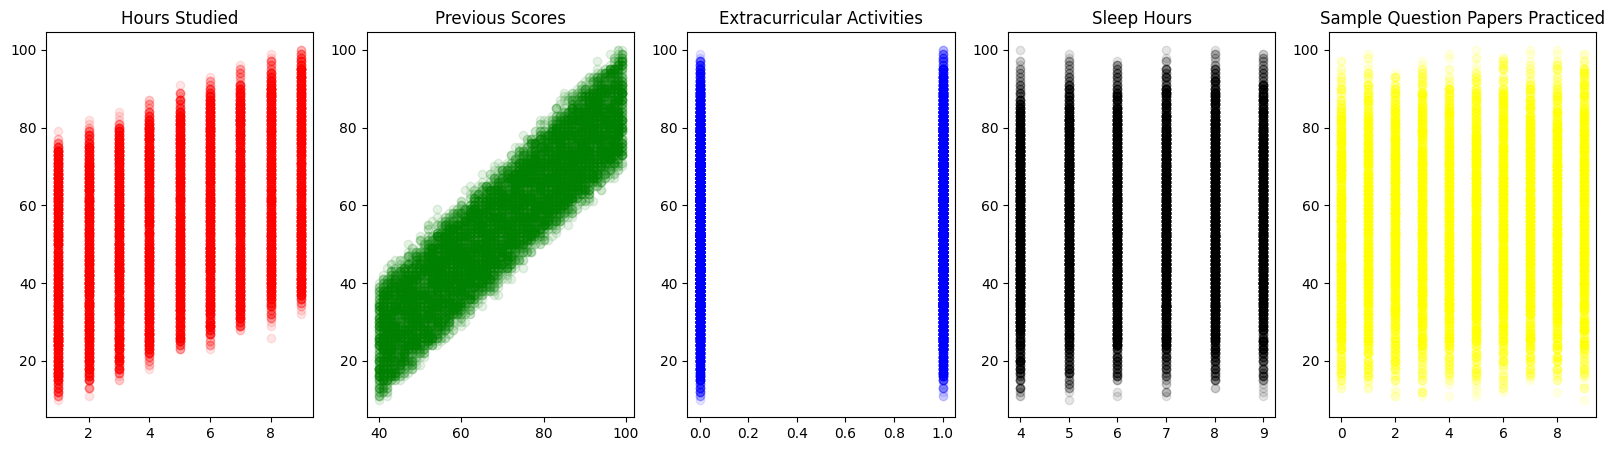

In [88]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].scatter(X[0], Y, color='red', alpha=0.1)
axes[0].set_title('Hours Studied')

axes[1].scatter(X[1], Y, color='green', alpha=0.1)
axes[1].set_title('Previous Scores')

axes[2].scatter(X[2], Y, color='blue', alpha=0.1)
axes[2].set_title('Extracurricular Activities')

axes[3].scatter(X[3], Y, color='black', alpha=0.1)
axes[3].set_title('Sleep Hours')

axes[4].scatter(X[4], Y, color='yellow', alpha=0.1)
axes[4].set_title('Sample Question Papers Practiced')

plt.show()

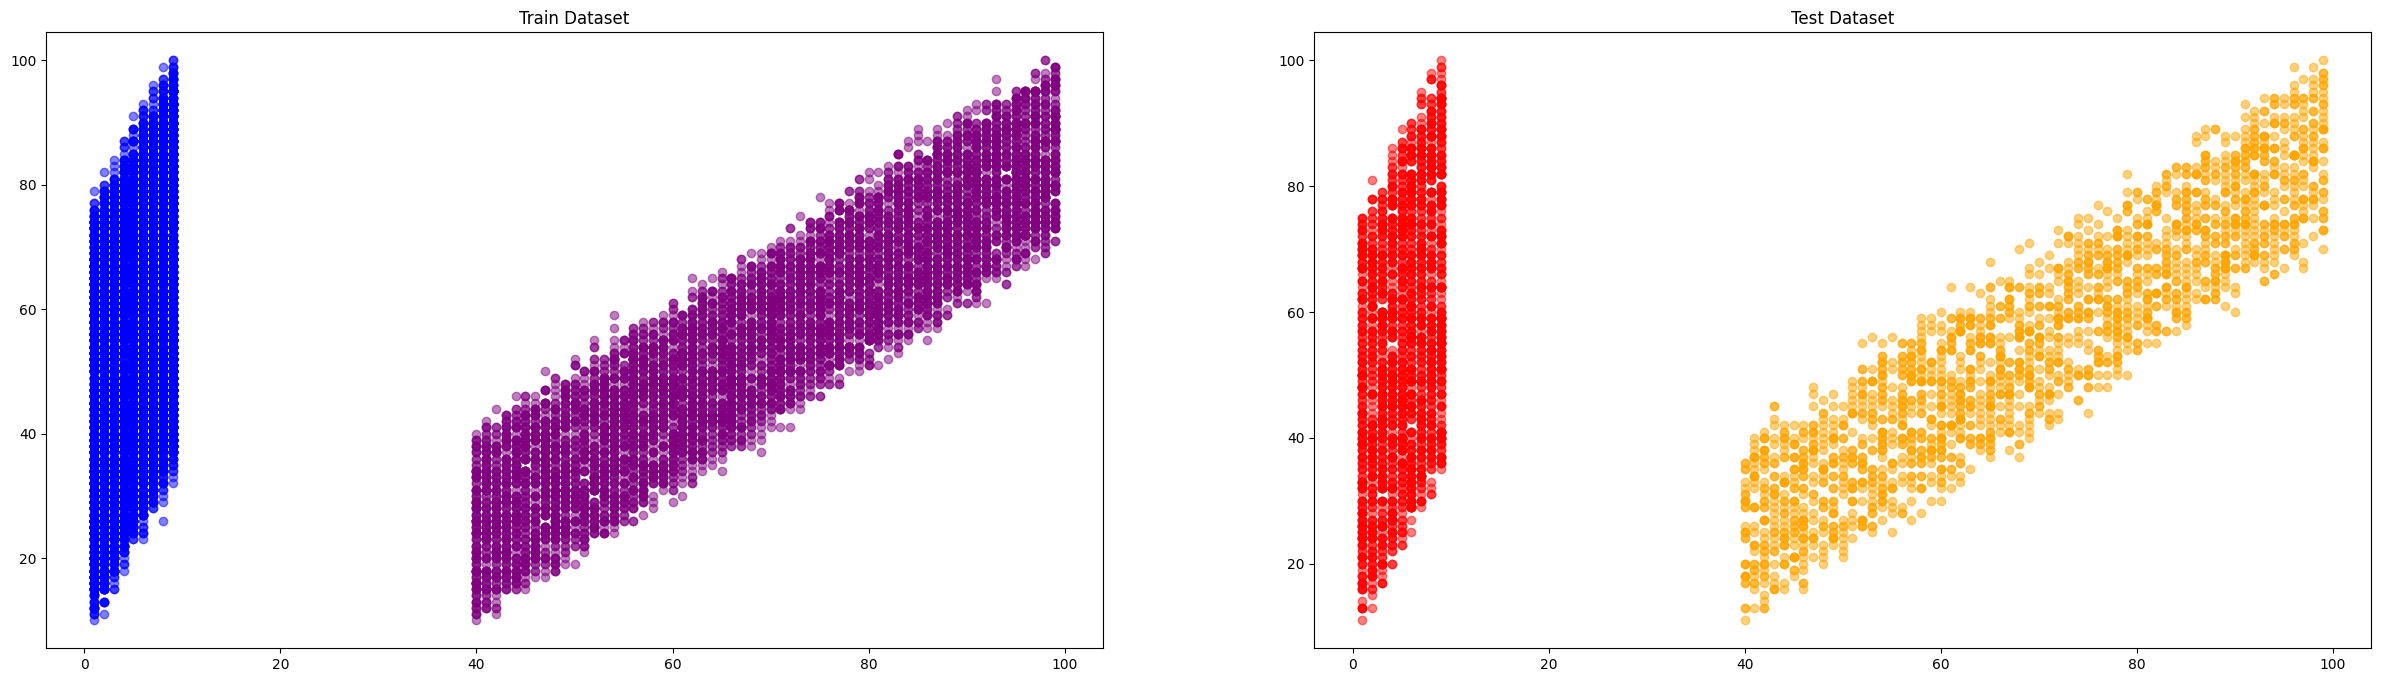

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(30, 8))

axes[0].scatter(train['Hours Studied'], train['Performance Index'], color='blue', alpha=0.5)
axes[0].scatter(train['Previous Scores'], train['Performance Index'], color='purple', alpha=0.5)
axes[0].set_title('Train Dataset')

axes[1].scatter(test['Hours Studied'], test['Performance Index'], color='red', alpha=0.5)
axes[1].scatter(test['Previous Scores'], test['Performance Index'], color='orange', alpha=0.5)
axes[1].set_title('Test Dataset')

plt.show()

In [90]:
reg = linear_model.LinearRegression()
train_X = np.asanyarray(train[['Hours Studied', 'Previous Scores']])
train_Y = np.asanyarray(train['Performance Index'])
reg.fit(train_X, train_Y)

LinearRegression()

In [91]:
test_X = np.asanyarray(test[['Hours Studied', 'Previous Scores']])
test_Y = np.asanyarray(test['Performance Index'])
y_hat = reg.predict(test_X)

In [92]:
score = r2_score(test_Y, y_hat)
score_r = np.round(score, 2)
print(score_r)

0.99


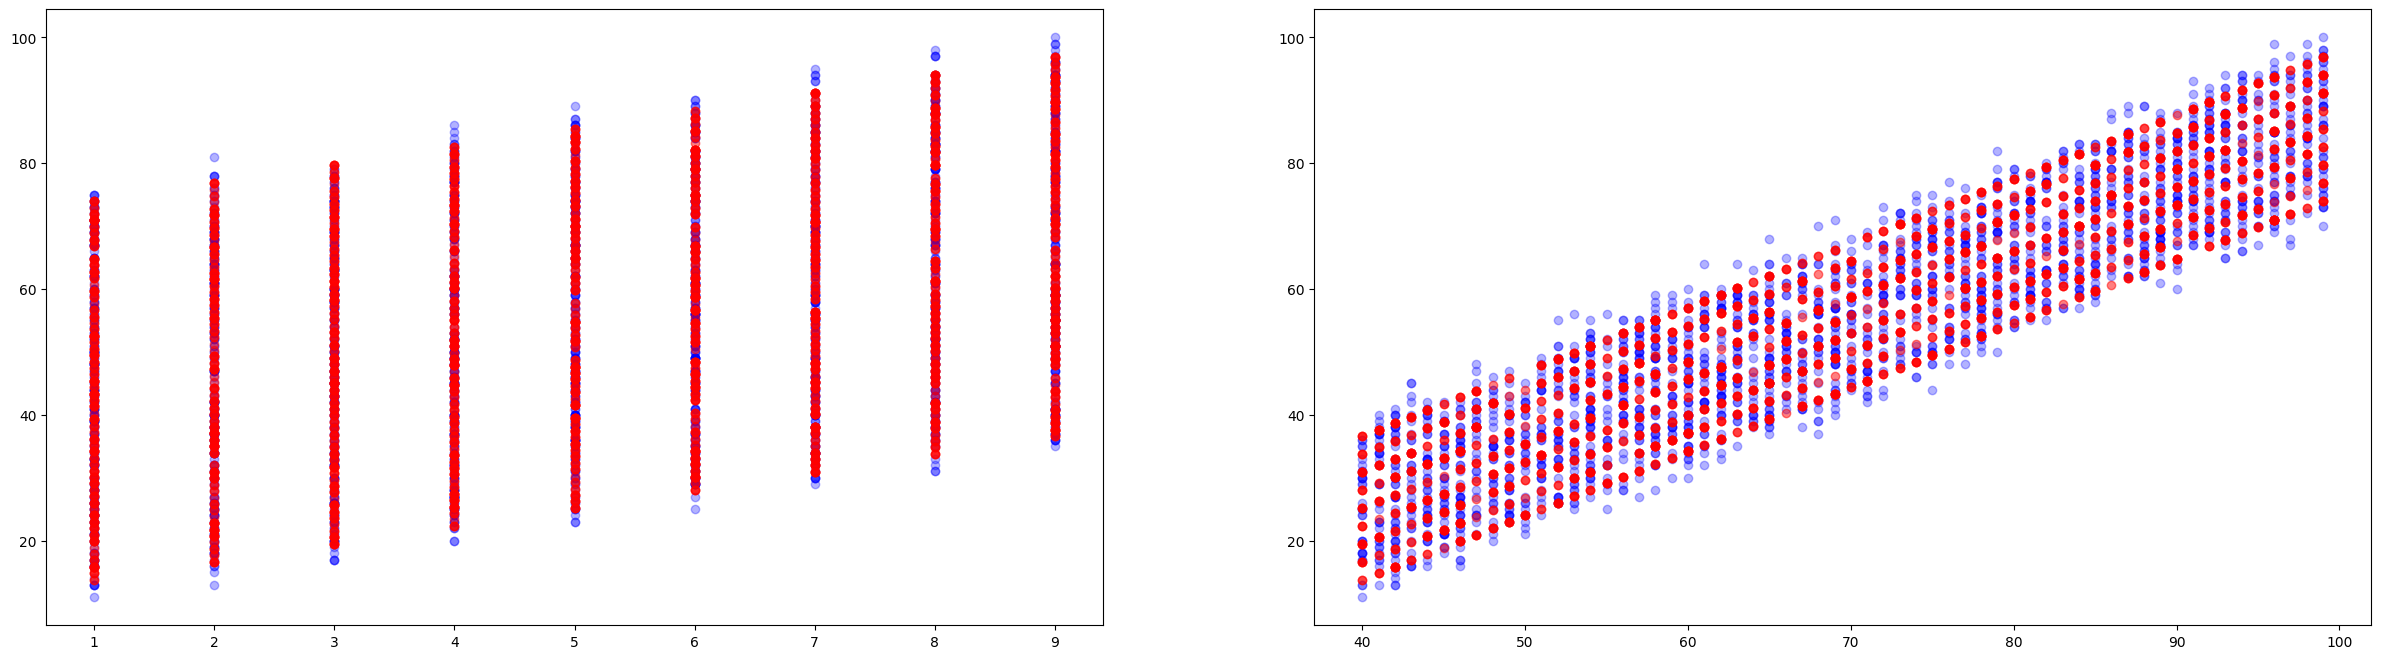

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(30, 8))

axes[0].scatter(test['Hours Studied'], test['Performance Index'], color='blue', alpha=0.3)
axes[0].scatter(test['Hours Studied'], y_hat, color='red', alpha=0.5)

axes[1].scatter(test['Previous Scores'], test['Performance Index'], color='blue', alpha=0.3)
axes[1].scatter(test['Previous Scores'], y_hat, color='red', alpha=0.5)

plt.show()